#Reinforcement Learning (RL):
Unlike supervised or unsupervised learning in RL, we don't provide any dataset to train our model. Instead, we have an environment to interact.<br>

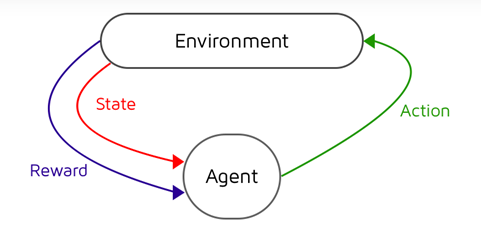

Important keywords:<br>
* **Agent:** take actions in the environment.
* **Environment:** the world in which the agent exists and conducts all the activities.
* **Action:** a move agent can make in the environment.
* **State:** a situation in which the agent finds itself.
* **Reward:** feedback that measures the success or failure of the agent's action provided by the environment.

###Q-function:
The Q function takes the current state and action that the agent takes in that state as input and returns the expected total future reward that the agent can receive after that point.<br>
The best action is that maximizes future rewards.<br>
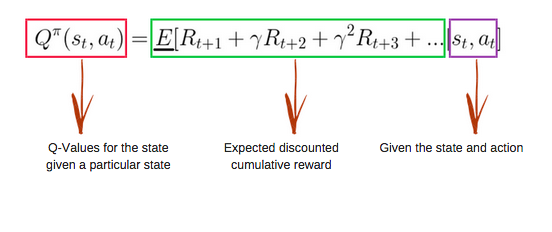

##Q-Learning Algorithm:
The main aim is to find the optimal value of the Q function using the Bellman optimality equation.<br>
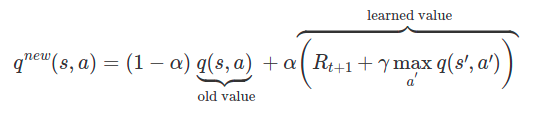<br>
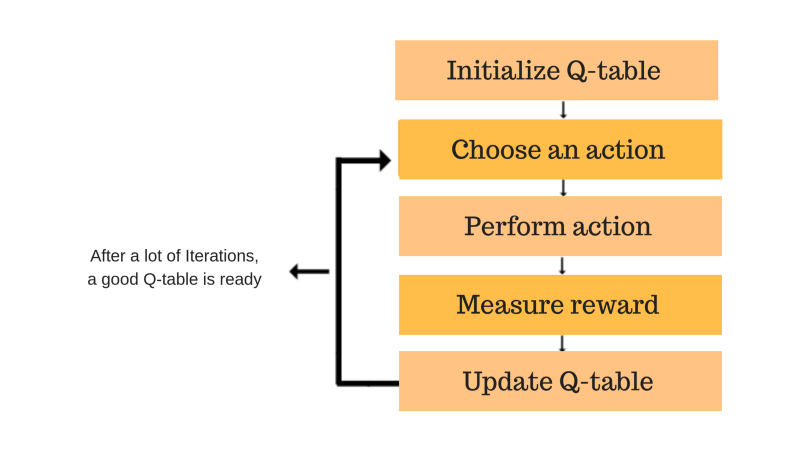

In the Q table, we calculate the minimum expected future rewards for action at each state.

#Implementation of Q-Learning

In [ ]:
import numpy as np
import gym    #toolkit for developing and comparing reinforcement learning algorithms

####FrozenLake-v0:
The agent controls the movement of a character in a grid world. Some tiles of the grid are walkable, and others lead to the agent falling into the water. Additionally, the movement direction of the agent is uncertain and only partially depends on the chosen direction. The agent is rewarded for finding a walkable path to a goal tile.<br>
FrozenLake grid: <br>
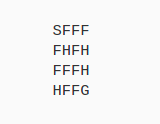

In [ ]:
env = gym.make("FrozenLake-v0")
n_observations = env.observation_space.n
n_actions = env.action_space.n

In [ ]:
n_observations

16

In [ ]:
n_actions

4

In [ ]:
Q_table = np.zeros((n_observations,n_actions))

In [ ]:
Q_table

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [ ]:
Q_table.shape

(16, 4)

In [ ]:
tot_episodes = 15000
learning_rate = 0.1
gamma = 0.95    #discounted factor
max_steps_episode = 100
exploration_probability = 1
decay = 0.001
min_exploration_probability = 0.1

In [ ]:
rewards = []

In [ ]:
for episode in range(tot_episodes):
  current_state = env.reset()
  tot_rewards = 0
  done = False
  for i in range(max_steps_episode):
    if np.random.uniform(0,1) > exploration_probability:
      action = np.argmax(Q_table[current_state,:])
    else:
      action = env.action_space.sample()
    
    new_state, reward, done, information = env.step(action)
    Q_table[current_state, action] = (1-learning_rate)*Q_table[current_state, action] + learning_rate*(reward + gamma*max(Q_table[new_state,:]))
    tot_rewards+=reward

    if done:
      break

    current_state = new_state

  exploration_probability = max(min_exploration_probability, np.exp(-decay*episode))
  rewards.append(tot_rewards)

In [ ]:
print(rewards)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,

In [ ]:
print(sum(rewards))

4817.0


In [ ]:
print("Rewards/Total episodes: " + str(sum(rewards)/tot_episodes))

Rewards/Total episodes: 0.3211333333333333


In [ ]:
Q_table

array([[0.18808927, 0.13549862, 0.16093925, 0.14510994],
       [0.08796575, 0.10020752, 0.09930939, 0.14021592],
       [0.11903317, 0.12170931, 0.11419482, 0.11294728],
       [0.08455728, 0.08994757, 0.05228923, 0.10110963],
       [0.21284939, 0.14231882, 0.17082957, 0.07135808],
       [0.        , 0.        , 0.        , 0.        ],
       [0.11714845, 0.11912926, 0.13748699, 0.02899684],
       [0.        , 0.        , 0.        , 0.        ],
       [0.15734064, 0.17868804, 0.16707981, 0.26352885],
       [0.26710378, 0.34806833, 0.30578328, 0.22960478],
       [0.38427602, 0.27069725, 0.19231143, 0.20028666],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.32246913, 0.36091894, 0.42215709, 0.36906759],
       [0.53843454, 0.56373042, 0.72491659, 0.56120605],
       [0.        , 0.        , 0.        , 0.        ]])

In [ ]:
for episode in range(3):
  current_state = env.reset()
  done=False
  step = 0
  print("Episode: ", episode)
  for step in range(max_steps_episode):
    action = np.argmax(Q_table[current_state,:])
    new_state, reward, done, information = env.step(action)
    if done:
      env.render()
      print("Steps: ", step)
      break;
    current_state = new_state
  print('\n')
env.close()

Episode:  0
  (Right)
SFFF
FHFH
FFFH
HFFG
Steps:  47


Episode:  1
  (Right)
SFFF
FHFH
FFFH
HFFG
Steps:  53


Episode:  2
  (Right)
SFFF
FHFH
FFFH
HFFG
Steps:  19




#####References:
* https://aamrani1999.medium.com/a-gentle-introduction-to-reinforcement-learning-d26cba6455f7
* https://towardsdatascience.com/q-learning-algorithm-from-explanation-to-implementation-cdbeda2ea187
* https://www.freecodecamp.org/news/an-introduction-to-q-learning-reinforcement-learning-14ac0b4493cc/